## Red Neuronal 
Predecir ASCI utilizando lo Espectros InfraRojos (IR)

## Librerias

In [10]:
#librerias

#Tratamiento Datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Red Neuronal
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist #importar dataset mnist (numeros)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA   #Algoritmo PCA
import tensorflow as tf

# Graficas
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt



In [11]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento Datos**


### Importar Datos IR

In [12]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR = pd.read_excel("Data/ASCI_IR.xlsx") #import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR.shape)#Ver tamaño dataset
Datos_IR.head() #print dt frame

(82, 7469)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145


In [13]:
Datos_IR=Datos_IR.drop(Datos_IR.columns[0], axis=1)
print(Datos_IR.shape)
Datos_IR.head()

(82, 7468)


,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145


In [14]:
# IR transpose

Datos_IR = Datos_IR.transpose()
print(Datos_IR.shape)
Datos_IR.head()

(7468, 82)


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
1,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
2,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
3,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
4,0.010022,0.012352,0.017360,0.015276,0.006081,0.008482,0.012639,0.026994,0.009770,0.015676,...,0.034033,0.026838,0.018222,0.012398,0.038242,0.011025,0.014117,0.019159,0.016641,0.035521


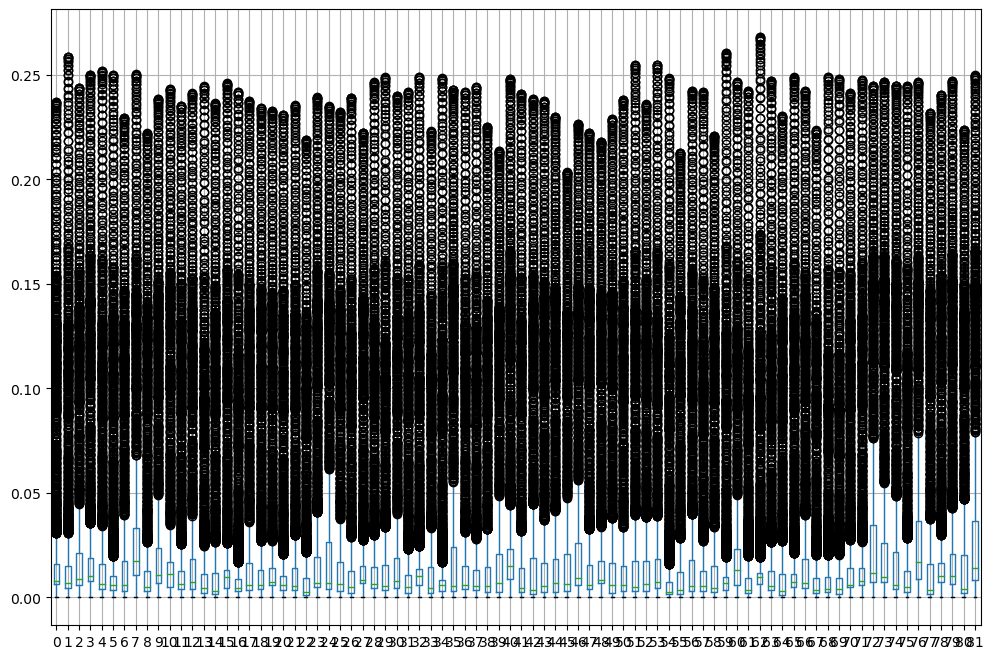

In [15]:
plt.figure(figsize=(12, 8))
Datos_IR.boxplot()

plt.savefig('Graficas/BoxplotASCI.png')

plt.show()

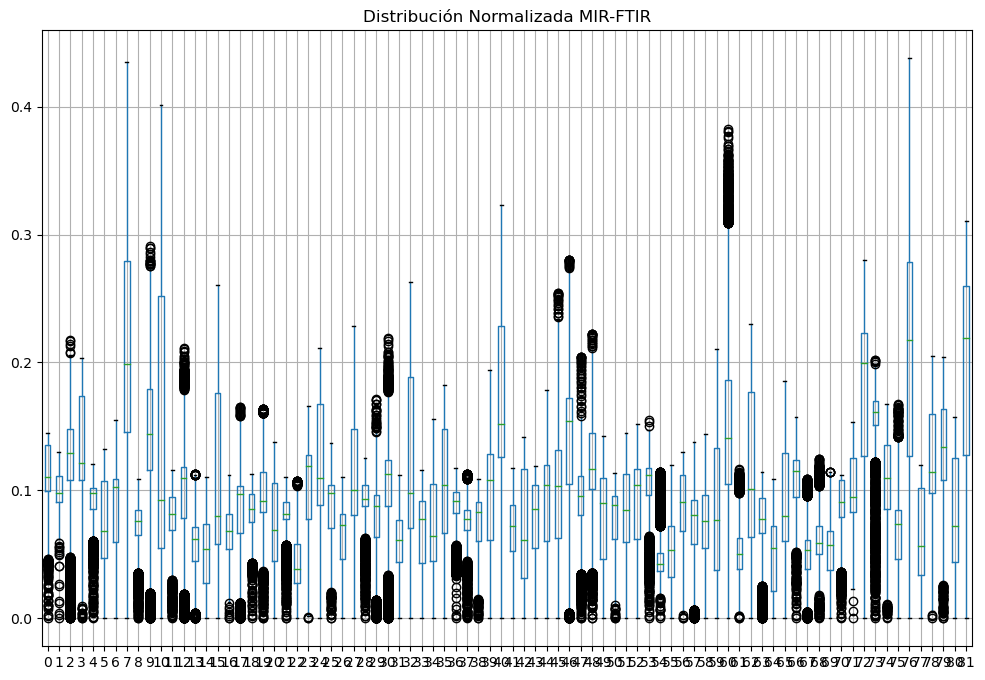

In [16]:
from sklearn.preprocessing import Normalizer

# Crear una instancia del normalizador
normalizer = Normalizer()

# Normalizar los datos
Datos_IR_normalized = normalizer.fit_transform(Datos_IR)

# Convertir de nuevo a DataFrame
Datos_IR_normalized = pd.DataFrame(Datos_IR_normalized, columns=Datos_IR.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 8))
Datos_IR_normalized.boxplot()
plt.title('Distribución Normalizada MIR-FTIR')
plt.savefig('Graficas/BoxplotASCI_Normalized.png')
plt.show()

In [17]:
Datos_IR_normalized_transpose=Datos_IR_normalized.transpose() 
print(Datos_IR_normalized_transpose)
print (Datos_IR_normalized_transpose.shape)

        0         1         2         3         4         5         6     \
0   0.082180  0.083221  0.082089  0.079192  0.075435  0.071811  0.069103   
1   0.092336  0.092785  0.093031  0.093031  0.092966  0.093138  0.093826   
2   0.138412  0.135882  0.133668  0.131899  0.130660  0.129913  0.129590   
3   0.117522  0.118038  0.117604  0.116518  0.114977  0.113123  0.111025   
4   0.051398  0.051843  0.050562  0.048218  0.045766  0.044249  0.044389   
..       ...       ...       ...       ...       ...       ...       ...   
77  0.088891  0.090911  0.090079  0.087091  0.082983  0.078852  0.075512   
78  0.112976  0.110341  0.108558  0.107320  0.106254  0.105088  0.103663   
79  0.107525  0.113794  0.122963  0.133629  0.144201  0.153143  0.159375   
80  0.089598  0.100831  0.111016  0.119363  0.125247  0.128493  0.129512   
81  0.269778  0.271384  0.271305  0.269843  0.267353  0.264489  0.262050   

        7         8         9     ...      7458      7459      7460      7461  \
0   0.

In [18]:
print(Datos_IR_normalized_transpose.shape)
print(Datos_IR_normalized.shape)

(82, 7468)
(7468, 82)


In [20]:
# pca = PCA(n_components=7468)
# pca.fit(Datos_IR_normalized_transpose)

# explained_variance_ratio = pca.explained_variance_ratio_

# cumulative_variance = np.cumsum(explained_variance_ratio)

# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')

# plt.title('Varianza Explicada Acumulada vs Número de Componentes')
# plt.xlabel('Número de Componentes')
# plt.ylabel('Varianza Explicada Acumulada')
# plt.xlim(1, 7468)  # Asegurarse de que el eje X muestre hasta 7468 componentes
# plt.grid(True)
# plt.show()


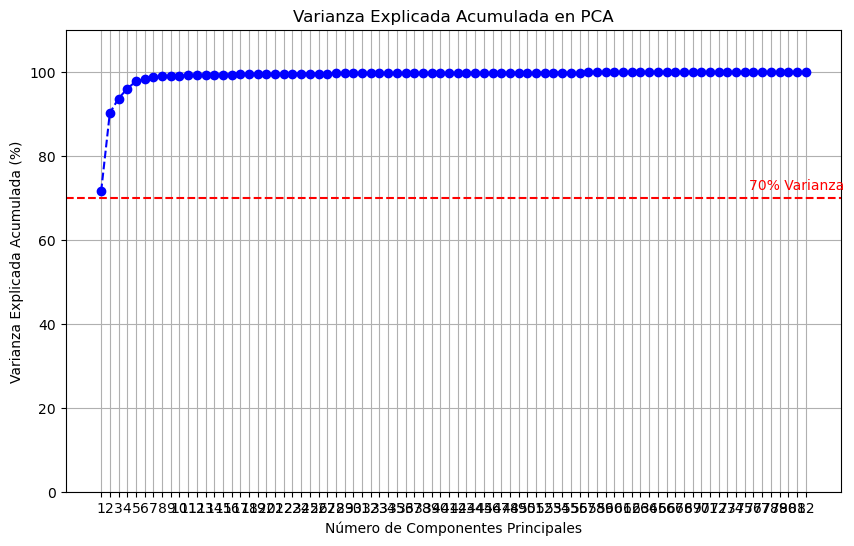

In [21]:
# Realizar PCA
pca = PCA()
pca.fit(Datos_IR_normalized)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada) * 100  # Multiplicar por 100 para obtener porcentajes

# Graficar % de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada en PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')  # Cambiado a porcentaje
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim(0, 110)  # Escala de 0 a 100%
plt.grid()

# Línea para el umbral del 95% (ajustar este valor si es necesario)
umbral_varianza = 70  # Cambia este valor si deseas otro umbral
plt.axhline(y=umbral_varianza, color='r', linestyle='--')  
plt.text(len(varianza_acumulada) - 1, umbral_varianza + 2, f'{umbral_varianza}% Varianza', color='red', ha='center')
plt.savefig('Graficas/%VarianzaExplicadaAcumuladaEspectroscopiaInfraRojos.png')
plt.show()

In [22]:
n_componentes = 2
pca = PCA(n_components=n_componentes)
valtn_transformado = pca.fit_transform(Datos_IR_normalized_transpose)

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100
print("Varianza explicada por cada uno de los 5 componentes:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.2f}%")

# Guardar los datos transformados en un DataFrame
datos_pca = pd.DataFrame(data=valtn_transformado, columns=[f'Componente_{i}' for i in range(1, n_componentes + 1)])

# Mostrar las primeras filas del DataFrame transformado
print("\nPrimeras filas de los datos transformados:")
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca.head())

Varianza explicada por cada uno de los 5 componentes:
Componente 1: 50.71%
Componente 2: 38.13%

Primeras filas de los datos transformados:
(82, 2)
<class 'pandas.core.frame.DataFrame'>
   Componente_1  Componente_2
0      0.004080      2.538511
1      0.505680      0.350861
2      4.174171     -0.652743
3     -1.072595      4.897747
4      0.101955     -0.475238


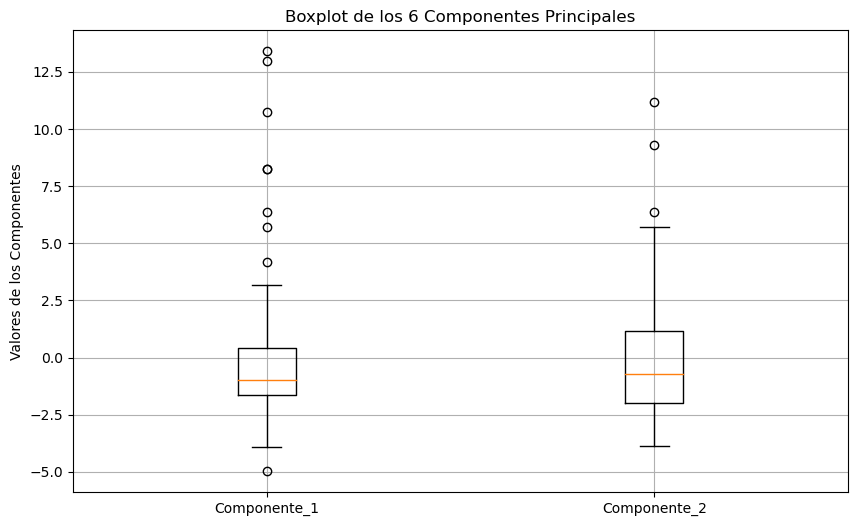

In [23]:
import matplotlib.pyplot as plt

# Crear un boxplot para los 5 componentes utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([datos_pca[f'Componente_{i}'] for i in range(1, 3)], labels=[f'Componente_{i}' for i in range(1, 3)])
plt.title('Boxplot de los 6 Componentes Principales')
plt.ylabel('Valores de los Componentes')
plt.grid()
plt.show()


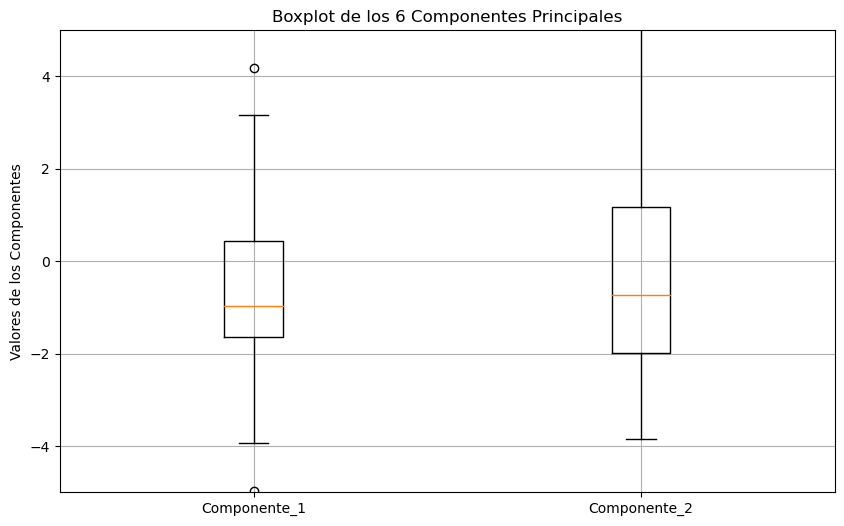

In [24]:
import matplotlib.pyplot as plt

# Crear un boxplot para los 5 componentes utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([datos_pca[f'Componente_{i}'] for i in range(1, 3)], labels=[f'Componente_{i}' for i in range(1, 3)])
plt.title('Boxplot de los 6 Componentes Principales')
plt.ylabel('Valores de los Componentes')
plt.ylim(-5, 5)  # Establecer los límites del eje y entre -5 y 5
plt.savefig('Graficas/BoxplotPCAEspectroscopiaIR.png')
plt.grid()
plt.show()

In [25]:
# valSum=Datos_IR_normalized_transpose.sum(axis=1)
# valorSumados=valSum.values
# print(valorSumados)
# print(valorSumados.shape)

In [26]:
# suma=valorSumados.reshape(82,1) #Reshape
# Datos_IRMean=Datos_IR_normalized_transpose/suma 

# # #dt_List_Comp - Transpuestos/SumaColumnas
# print(Datos_IRMean.shape)
# Datos_IRMean.head()

In [27]:
# from sklearn.decomposition import PCA   #Algoritmo PCA
# #Creacion Modelo PCA 3 componentes
# pca=PCA(n_components=3) 
# pca.fit(Datos_IRMean) # obtener los componentes principales
# datos_pca=pca.transform(Datos_IRMean) # convertimos nuestros datos con las nuevas dimensiones de PCA
# print(datos_pca.shape)
# print(type(datos_pca))
# print(datos_pca)

### Definir features y targets

In [28]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR_Target = pd.read_excel("Data/ASCI_IR.xlsx", sheet_name='ASCI')#import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR_Target.shape)#Ver tamaño dataset
Datos_IR_Target #print dt frame

(82, 1)


,label
0,10
1,10
2,13
3,11
4,11
...,...
77,8
78,10
79,9
80,11


In [29]:
# print(dt_features.shape)
# print(dt_target.shape)

In [31]:
dt_features= Datos_IR.values[:,:] 
dt_features

array([[1.10966015e-02, 1.24679071e-02, 1.86894114e-02, ...,
        1.45187850e-02, 1.20981036e-02, 3.64273530e-02],
       [1.11991453e-02, 1.24862852e-02, 1.82859382e-02, ...,
        1.53134737e-02, 1.35690496e-02, 3.65206370e-02],
       [1.09848555e-02, 1.24491321e-02, 1.78871333e-02, ...,
        1.64545678e-02, 1.48558137e-02, 3.63052743e-02],
       ...,
       [7.51200917e-03, 3.97298076e-03, 1.27441867e-06, ...,
        1.18493698e-02, 4.20803575e-03, 9.59961893e-06],
       [7.50250605e-03, 3.97471363e-03, 5.94731911e-06, ...,
        1.18557313e-02, 4.20305128e-03, 5.00847036e-06],
       [7.49422931e-03, 3.97558006e-03, 1.27443550e-05, ...,
        1.18633563e-02, 4.19621426e-03, 0.00000000e+00]])

In [32]:
dt_target= Datos_IR_Target.values[:,0] 
dt_target

array([10, 10, 13, 11, 11, 14, 10, 14, 16, 18, 16, 12, 15, 17, 10, 12, 12,
       12, 15, 19, 15, 11, 12, 17, 11, 11, 16, 19, 20, 16, 13, 15, 13, 14,
       13,  5, 11, 12, 18, 15, 17, 16, 17, 12, 17,  8, 17, 17, 17, 17,  6,
       17, 12, 15, 14, 20, 20, 11, 16, 17, 17, 13, 15, 16, 15, 14, 15, 10,
       20, 14, 20, 10,  9, 13, 11, 12, 13,  8, 10,  9, 11, 12],
      dtype=int64)

In [33]:
# dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos

In [34]:
print(dt_features.shape)
dt_features=dt_features.transpose()
print(dt_features.shape)
print(dt_target.shape)

(7468, 82)
(82, 7468)
(82,)


## Aplicacion Red Neuronal

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [36]:
X_train, X_test, y_train, y_test= train_test_split(datos_pca, dt_target, train_size = 0.8, random_state = 0) #parametro random state permite que siempre su usen las mismas muestras

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
datos_pca.shape
print(dt_target.shape)
type(datos_pca)

(65, 2)
(65,)
(17, 2)
(17,)
(82,)


pandas.core.frame.DataFrame

In [38]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

print (train_labels)
print (train_labels.shape)

print(test_labels)
print(test_labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(65, 21)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [39]:
from keras import layers, models


model = models.Sequential()
#Revisar input shape 
model.add(layers.Dense(7468, activation='relu', input_shape=(2,)))  

model.add(layers.Dense(5000, activation='relu'))
model.add(layers.Dense(4000, activation='relu'))
model.add(layers.Dense(3000, activation='relu'))
model.add(layers.Dense(2000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))


model.add(layers.Dense(21, activation='softmax'))


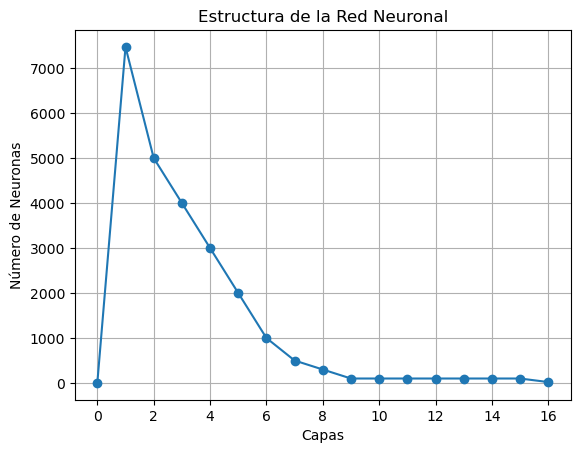

In [4]:
# Función para visualizar la estructura de la red neuronal
def plot_model_structure(model):
    layer_sizes = [layer.output_shape[1] for layer in model.layers]
    layer_sizes.insert(0, model.input_shape[1])
    
    fig, ax = plt.subplots()
    ax.plot(layer_sizes, marker='o')
    ax.set_title('Estructura de la Red Neuronal')
    ax.set_xlabel('Capas')
    ax.set_ylabel('Número de Neuronas')
    ax.grid(True)
    plt.show()

# Llamar a la función para visualizar la estructura
plot_model_structure(model)

In [40]:
from keras.optimizers import Adam

#compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,  
              loss='categorical_crossentropy',
              metrics=['mae', 'accuracy'])

In [47]:
history = model.fit(X_train, train_labels, 
                validation_split=0.2, 
                epochs=100, 
                batch_size=128)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.0774 - mae: 0.0804 - accuracy: 0.2692 - val_loss: 3.7418 - val_mae: 0.0888 - val_accuracy: 0.0769
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 2.0726 - mae: 0.0774 - accuracy: 0.2885 - val_loss: 3.3480 - val_mae: 0.0874 - val_accuracy: 0.0769
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.0089 - mae: 0.0793 - accuracy: 0.2885 - val_loss: 3.3091 - val_mae: 0.0872 - val_accuracy: 0.0769
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 2.0161 - mae: 0.0792 - accuracy: 0.2500 - val_loss: 3.8214 - val_mae: 0.0888 - val_accuracy: 0.1538
Epoch 5/100
1/1 [==============================] - 1s 935ms/step - loss: 2.0547 - mae: 0.0786 - accuracy: 0.2308 - val_loss: 3.6598 - val_mae: 0.0880 - val_accuracy: 0.0769
Epoch 6/100
1/1 [==============================] - 1s 810ms/step - loss: 2.1024 - mae: 0.0785 - accuracy: 0.2500 - val_loss: 3.2029 - val_mae: 0.08

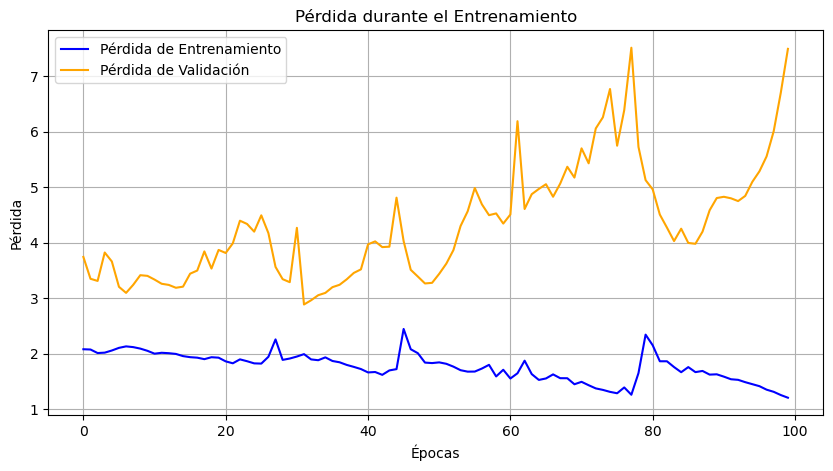

In [48]:

# Gráfico de Pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='orange')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

In [99]:
print(X_train.shape)
# print(X_train)
print(y_train.shape)
print(train_labels.shape)
# print(y_train)

(65, 7468)
(65,)
(65, 21)


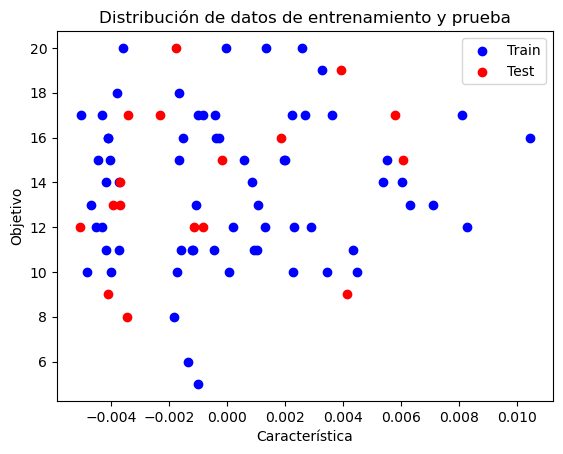

In [42]:
import matplotlib.pyplot as plt

# Seleccionar una columna específica para graficar
feature_index = 0  # Índice de la columna que deseas graficar

plt.scatter(X_train[:, feature_index], y_train, color='blue', label='Train')
plt.scatter(X_test[:, feature_index], y_test, color='red', label='Test')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Distribución de datos de entrenamiento y prueba')
plt.legend()
plt.show()


In [165]:
#Normalizacion Datos
def crear_normalizador(data):
    normalizer= Normalization (axis=1)
    normalizer.adapt(np.array(data))
    return normalizer

In [166]:
normalizador = crear_normalizador(X_train)

In [287]:
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop, SGD

def crean_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    optimizador=Adam(learning_rate=0.001)
    model.compile(optimizer=optimizador, loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model


In [288]:
nn= crean_nn_regresion(normalizador)

In [291]:
# Entrenamiento modelo
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.1,
    verbose=1,
    epochs=100
)

Epoch 1/100
2/2 [==============================] - 0s 108ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 6.5583 - val_mean_squared_error: 6.5583
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 6.5281 - val_mean_squared_error: 6.5281
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 6.3546 - val_mean_squared_error: 6.3546
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 6.4684 - val_mean_squared_error: 6.4684
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 6.8250 - val_mean_squared_error: 6.8250
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 6.8564 - val_mean_squared_error: 6.8564
Epoch 7/100
2/2 [======================

In [5]:
# Gráfica de Pérdida (Loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='orange')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x500 with 0 Axes>

In [292]:
#Valor final Borrar para mas orden al final esta repetido
nn.evaluate(X_train, y_train, verbose=1)
nn.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 50ms/step - loss: 28.8339 - mean_squared_error: 28.8339


[28.83386993408203, 28.83386993408203]

In [293]:
## Predicciones
y_pred = nn.predict(X_train).flatten()
y_pred_test= nn.predict(X_test).flatten()

print(len(y_pred))

1/1 [==============================] - 0s 46ms/step
65


In [43]:
import matplotlib.pyplot as plt

# Plot de pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [295]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [296]:
print(r2)
print(mse)

-2.3818947248358264
28.833870595140056


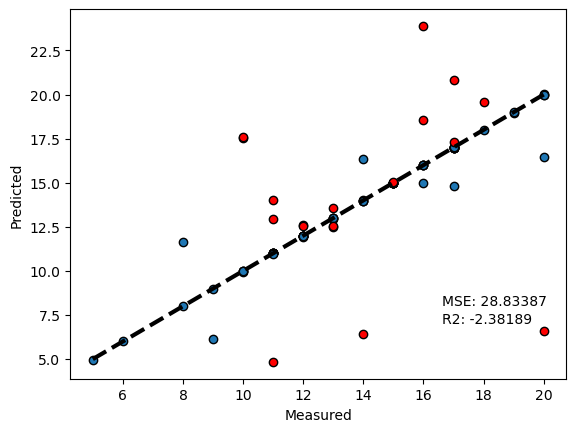

In [297]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {mse:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

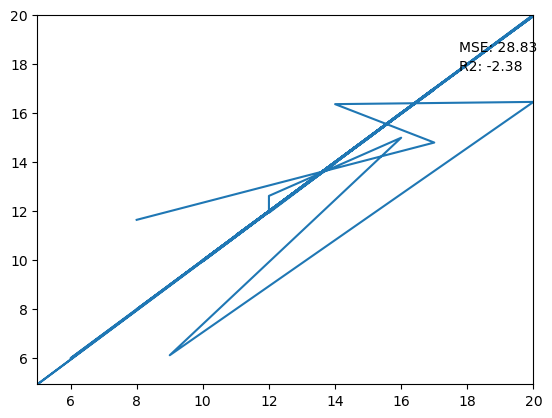

In [298]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Obtén los valores de mse y r2
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Crea tu gráfica
plt.plot(y_train, y_pred)  # Reemplaza x y y con tus datos de la gráfica

# Agrega el texto en el costado de la gráfica
plt.text(0.85, 0.9, f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
plt.text(0.85, 0.85, f"R2: {r2:.2f}", transform=plt.gca().transAxes)

# Establece los límites del eje x y y según tus datos
plt.xlim(min(y_train), max(y_train))  
plt.ylim(min(y_pred), max(y_pred))

# Muestra la gráfica
plt.show()
